In [2]:
#import the needed libraries 
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Step 1: Import the Dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


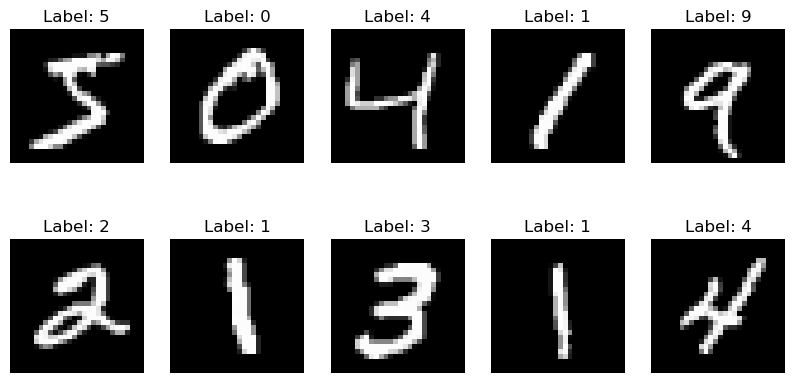

In [4]:
# Step 2: Explore and Visualize the Dataset
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [5]:
# Step 3: Preprocess the Data
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [6]:
# Step 4: Build an Advanced Neural Network
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(784,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation='softmax')
])

C:\Users\moham\anaconda3\envs\ai-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Step 5: Compile and Train the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=64)


Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7853 - loss: 0.6972 - val_accuracy: 0.9569 - val_loss: 0.1438
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9345 - loss: 0.2161 - val_accuracy: 0.9638 - val_loss: 0.1160
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9511 - loss: 0.1673 - val_accuracy: 0.9685 - val_loss: 0.1026
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9569 - loss: 0.1417 - val_accuracy: 0.9707 - val_loss: 0.1017
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9621 - loss: 0.1295 - val_accuracy: 0.9753 - val_loss: 0.0846
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9653 - loss: 0.1129 - val_accuracy: 0.9791 - val_loss: 0.0741
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9689 - loss: 0.1070 - val_accuracy: 0.9767 - val_loss: 0.0781
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9706 - loss: 0.1017 - val_accuracy: 0.

In [9]:
# Step 6: Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9774 - loss: 0.0776
Test accuracy: 0.982200026512146


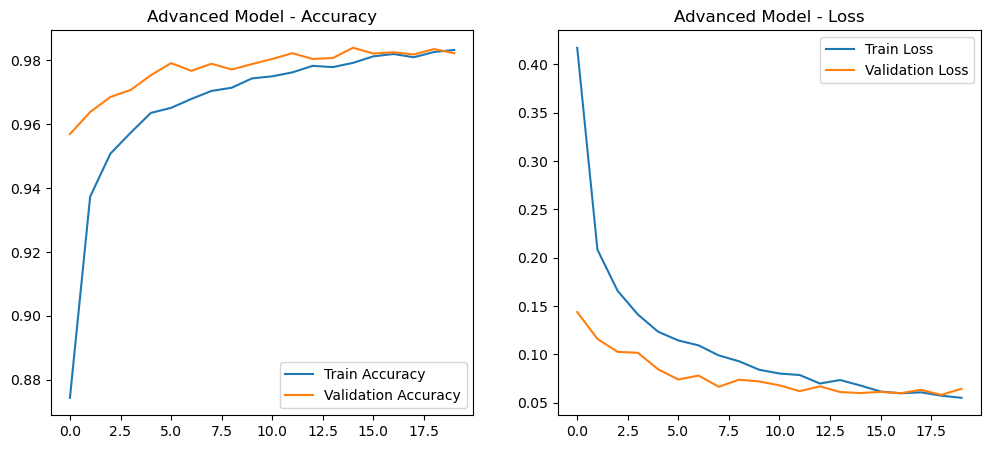

In [10]:
# Step 7: Plot Training and Validation Curves
def plot_history(history, title):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title(f'{title} - Accuracy')
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title(f'{title} - Loss')
    plt.show()

plot_history(history, "Advanced Model")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  


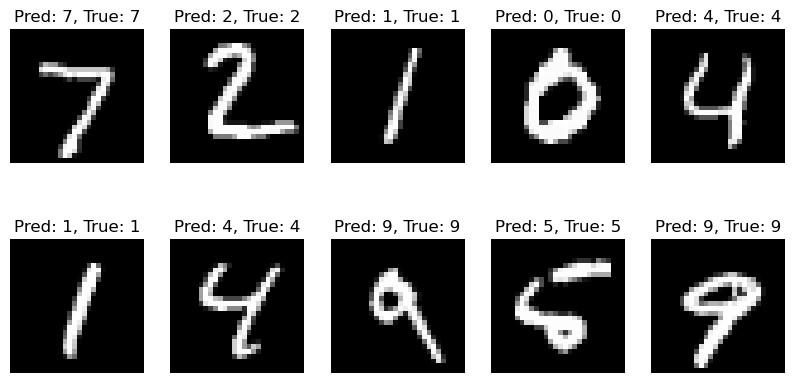

In [11]:
# Step 8: Make Predictions on New Data
predictions = model.predict(x_test)
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_pred[i]}, True: {y_true[i]}")
    plt.axis('off')
plt.show()

In [12]:
# Step 9: Identify Misclassified Images
misclassified = np.where(y_pred != y_true)[0]

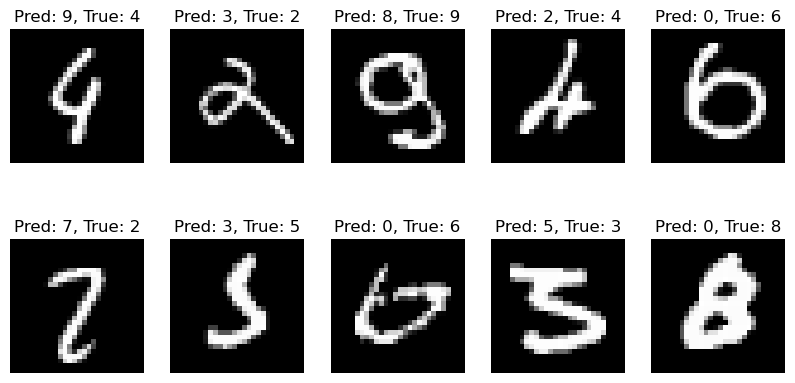

In [13]:
#plot missclassified 
plt.figure(figsize=(10, 5))
for i, idx in enumerate(misclassified[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_pred[idx]}, True: {y_true[idx]}")
    plt.axis('off')
plt.show()

In [14]:
# Step 10: Save and Load the Model
model.save("mnist_advanced_model.h5")
loaded_model = keras.models.load_model("mnist_advanced_model.h5")
test_loss, test_acc = loaded_model.evaluate(x_test, y_test)
print("Loaded Model Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9774 - loss: 0.0776    
Loaded Model Test Accuracy: 0.982200026512146
